In [1]:
!pip install python-ternary

# Plot the Results from the Al-Ni-Zr Holdout Test
In `build-and-test-gfa-model`, we performed a cross-validation test where we withheld all data from the Al-Ni-Zr ternary, trained a model on the remaining data, and then predicted the glass-forming ability in Al-Ni-Zr. This notebook plots the results from that test

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import SymLogNorm, PowerNorm
import pandas as pd
import ternary

Plot settings

In [3]:
labelSize = 10
tickSize = 10
titleSize = 12
plotWidth = 7.08661417 # Full width
plotHeight = 3.0
width = 0.8
markerSize = 1
plotDPI = 320
elems = ['Al', 'Ni', 'Zr']
bbox = {'edgecolor':'black', 'facecolor':'white'}

## Load in the Data
Both the original training set and the ML predictions

### Read Training Set
`training_data.csv` contains the atomic fractions and measured glass forming abilities (`gfa_measured`) for each alloy in the training set. We only need the Al-Ni-Zr entries

In [4]:
data = pd.read_csv('training_data.csv')

In [5]:
data.query('Al + Ni + Zr > 0.999', inplace=True)
print(len(data), 'training set entries in the Al-Ni-Zr system')

211 training set entries in the Al-Ni-Zr system


### Read ML Predictions
`alnizr_predictions.csv` contains the ML predictions for Al-Ni-Zr

In [6]:
run_data = pd.read_csv('alnizr_predictions.csv')

In [7]:
print(len(run_data), 'ML predictions')

5151 ML predictions


## Plot the data
Make two ternary plots: one with the training data, and the other with the ML predictions

In [8]:
def prettify(ax, label):
    """Add labels, remove axes, etc."""
    #   Add in labels
    ax.axis('off')
    
    # Define the limits
    ax.set_xlim([-5, 110])
    ax.set_ylim([-5, 110 * 3 ** 0.5 / 2])
    
    # Add the labels
    ax.text(110, -10, elems[0], ha='right', fontsize=labelSize) # 1st elem
    ax.text(50, 90, elems[1], ha='center', fontsize=labelSize) # 2nd elem
    ax.text(-10, -10, elems[2], ha='left', fontsize=labelSize) # 3rd elem
    ax.text(-10, fig.gca().get_ylim()[1]-10, label, fontweight='demi', fontsize=titleSize)

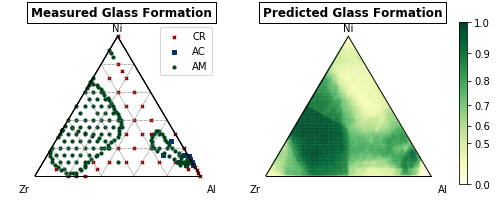

In [9]:
fig, axs = plt.subplots(1, 2, gridspec_kw=dict(width_ratios=[0.8,1]))

## Plot experimental data
for i,(s,ms) in enumerate(zip(['CR', 'AC', 'AM'], [
    ((0.6,0.01,0.01),'x'),
    ((0.031,0.188,0.419),'s'),
    ((0,0.26666668057441711,0.10588235408067703),'o')])):
    
    # Make the ternary plot
    _, tax = ternary.figure(scale=100, ax=axs[0])
    tax.gridlines(multiple=20, color='gray')

    # Convert to list
    my_data = data[data['gfa_measured'] == (2-i)] # Order of labels CR->AC->AM
    data_list = []
    for a,c,m in zip(my_data[elems[0]], my_data[elems[1]], my_data[elems[2]]):
            data_list.append((a*100,c*100,m*100))

    # Transform and plot
    xs, ys = ternary.helpers.project_sequence(data_list)
    sc = axs[0].scatter(xs, ys, s=10, color=ms[0], marker=ms[1], label=s)

    tax.boundary(linewidth=1.0)
prettify(axs[0], '')
axs[0].legend(loc=1, fontsize=labelSize)
axs[0].set_title('Measured Glass Formation', fontsize=titleSize, fontweight='demi', bbox=bbox)
    
## Plot the ML predictions
_, tax = ternary.figure(scale = 100, ax=axs[1])

# Convert to list
data_list = []
for a,c,m in zip(run_data[elems[0]], run_data[elems[1]], run_data[elems[2]]):
        data_list.append((a*100,c*100,m*100))

# Transform and plot
xs, ys = ternary.helpers.project_sequence(data_list)
tax.boundary(linewidth=1.0)
sc = axs[1].scatter(xs, ys, s=1, c=run_data['P(gfa=AM)_predicted'],
                norm=PowerNorm(2.0),
                cmap='YlGn', vmin=0, vmax=1, edgecolor='face')

cb = plt.colorbar(sc, ticks=[0,0.5,0.6,0.7,0.8,0.9,1.0])
prettify(axs[1], '')
axs[1].set_title('Predicted Glass Formation', fontsize=titleSize, fontweight='demi', bbox=bbox)

fig.set_size_inches(plotWidth, plotHeight)
fig.tight_layout()

fig.savefig('figures/alnizr-gfa.png', dpi=plotDPI)
fig.savefig('figures/alnizr-gfa.pdf')

Plot of just the ML predictions (for WholeTale cover image)

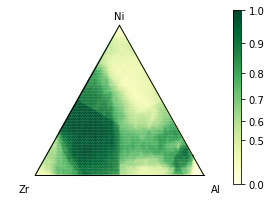

In [10]:
fig, ax = plt.subplots()
_, tax = ternary.figure(scale = 100, ax=ax)

# Convert to list
data_list = []
for a,c,m in zip(run_data[elems[0]], run_data[elems[1]], run_data[elems[2]]):
        data_list.append((a*100,c*100,m*100))

# Transform and plot
xs, ys = ternary.helpers.project_sequence(data_list)
tax.boundary(linewidth=1.0)
sc = ax.scatter(xs, ys, s=1, c=run_data['P(gfa=AM)_predicted'],
                norm=PowerNorm(2.0),
                cmap='YlGn', vmin=0, vmax=1, edgecolor='face')

cb = plt.colorbar(sc, ticks=[0,0.5,0.6,0.7,0.8,0.9,1.0])
prettify(ax, '')

fig.set_size_inches(plotWidth / 1.8, plotHeight)
fig.tight_layout()
fig.savefig('figures/alnizr_cover_image.png', dpi=plotDPI)